In [2]:
%matplotlib inline

from numpy import *
from numpy.linalg import norm
from matplotlib.pyplot import *
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
rcParams.update(newparams)

In [3]:
def ode_solver(f, x0, xend, y0, h, method):
    # Generic solver for ODEs
    #    y' = f(x,y), y(a)=y0
    # Input: f, the integration interval x0 and xend, 
    #        the stepsize h and the method of choice.  
    #   
    # Output: Arrays with the x- and the corresponding y-values. 
    
    # Initializing:
    y_num = array([y0])    # Array for the solution y 
    x_num = array([x0])    # Array for the x-values

    xn = x0                # Running values for x and y
    yn = y0 

    # Main loop
    while xn < xend - 1.e-10:            # Buffer for truncation errors        
        xn, yn = method(f, xn, yn, h)    # Do one step by the method of choice
        
        # Extend the arrays for x and y
        y_num = concatenate((y_num, array([yn])))
        x_num = append(x_num,xn)
        
    return x_num, y_num

# 3b+c

In [4]:
def heun(f, x, y, h):
    # One step of Heun's method
    k1 = f(x, y)
    k2 = f(x+h, y+h*k1)
    y_next = y + 0.5*h*(k1+k2)
    x_next = x + h
    return x_next, y_next

In [7]:
def f(x,y):
    return array(
        [
            y[1],
            -1 / (y[0]-y[2]) ** 2,
            y[3],
            1 / (y[0]-y[2]) ** 2,
        ]
    )

x0, xend = 0, 1
y0 = array([0, 1, 1, 0])

# Solve the equation
x_lv, y_lv = ode_solver(f, x0, xend, y0, h=0.1, method=heun)


print(y_lv)

[[ 0.          1.          1.          0.        ]
 [ 0.095       0.8882716   1.005       0.1117284 ]
 [ 0.17778924  0.75572145  1.02221076  0.24427855]
 [ 0.24634923  0.60614514  1.05365077  0.39385486]
 [ 0.29929193  0.44850899  1.10070807  0.55149101]
 [ 0.33635791  0.29477352  1.16364209  0.70522648]
 [ 0.35852959  0.15540339  1.24147041  0.84459661]
 [ 0.36765625  0.03608132  1.33234375  0.96391868]
 [ 0.36589163 -0.06235909  1.43410837  1.06235909]
 [ 0.35527394 -0.14204431  1.54472606  1.14204431]
 [ 0.33753543 -0.20617437  1.66246457  1.20617437]]


# 4a

In [8]:
def lotka_volterra(x, y):
    # Lotka-Volterra equation
    # Initial values y(0) = [2.0, 0.5]
    alpha, beta, delta, gamma = 2, 1, 0.5, 1     # Parameters
    dy = array([alpha*y[0]-beta*y[0]*y[1], 
                delta*y[0]*y[1]-gamma*y[1]])
    return dy


In [9]:
def rk4(f, x, y, h):
    k1 = f(x, y)
    k2 = f(x + h / 2, y + h / 2 * k1)
    k3 = f(x + h / 2, y + h / 2 * k2)
    k4 = f(x + h, y + h * k3)
    
    y_next = y + h*(k1 + 2*k2 + 2*k3 + k4)/6
    x_next = x + h
    return x_next, y_next

In [10]:
# Test the order of a method, given a test equation with exact solution
def f1(x, y):
    return -2*x*y

def y_eksakt(x):
    return exp(-x**2)

h = 0.1
x0, xend= 0, 1
y0 = 1

print('h           error          order \n----------------------------------')
 
for n in range(10):
    x_num, y_num = ode_solver(f1, x0, xend, y0, h, method = rk4)    
    error = norm(y_eksakt(xend)-y_num[-1])       # Error in the end point
    if n is 0:                 
        order = NaN          # Nothing to compare              
    else:
        order = log2(error_old/error)     # Calculate  the order p
    print(format('{:.3e}   {:.3e}   {:7.2f}'.format( h, error, order))) 
    h = 0.5*h               # Reduce the stepsize
    error_old = error 

h           error          order 
----------------------------------
1.000e-01   1.625e-06       nan
5.000e-02   1.025e-07      3.99
2.500e-02   6.407e-09      4.00
1.250e-02   3.999e-10      4.00
6.250e-03   2.497e-11      4.00
3.125e-03   1.559e-12      4.00
1.563e-03   9.520e-14      4.03
7.813e-04   8.549e-15      3.48
3.906e-04   1.110e-14     -0.38
1.953e-04   1.033e-14      0.10


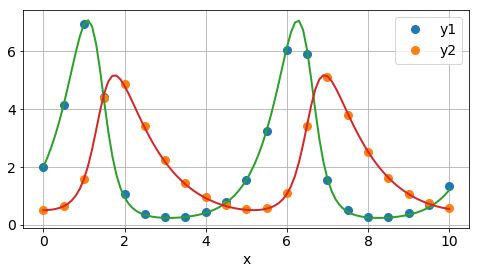

In [14]:
f = lotka_volterra
x0, xend = 0, 10
y0 = array([2, 0.5])


x_lv, y_lv = ode_solver(f, x0, xend, y0, 0.5, rk4)
plot(x_lv,y_lv, 'o');
xlabel('x')
legend(['y1','y2'],loc=1);


x_lv, y_lv = ode_solver(f, x0, xend, y0, 0.1, rk4)
plot(x_lv,y_lv);
xlabel('x')
legend(['y1','y2'],loc=1);

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in double_scalars
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


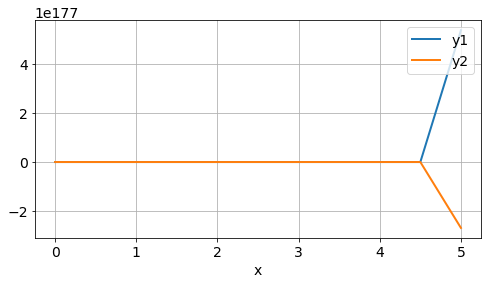

In [16]:
f = lotka_volterra
x0, xend = 0, 10
y0 = array([2, 0.5])
h = 0.5

x_lv, y_lv = ode_solver(f, x0, xend, y0, h, heun)
plot(x_lv, y_lv);
xlabel('x')
legend(['y1','y2'], loc=1);

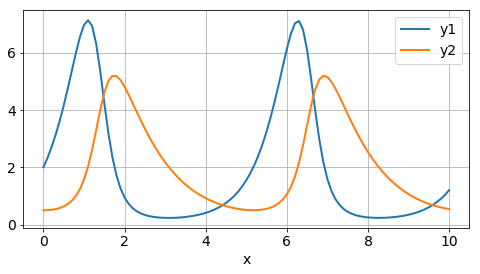

In [18]:
h = 0.1

x_lv, y_lv = ode_solver(f, x0, xend, y0, h, heun)
plot(x_lv, y_lv);
xlabel('x')
legend(['y1','y2'], loc=1);